In [8]:
%run ExoTides_v1.ipynb # load functions 

Text(-0.15, 1.05, 'D')

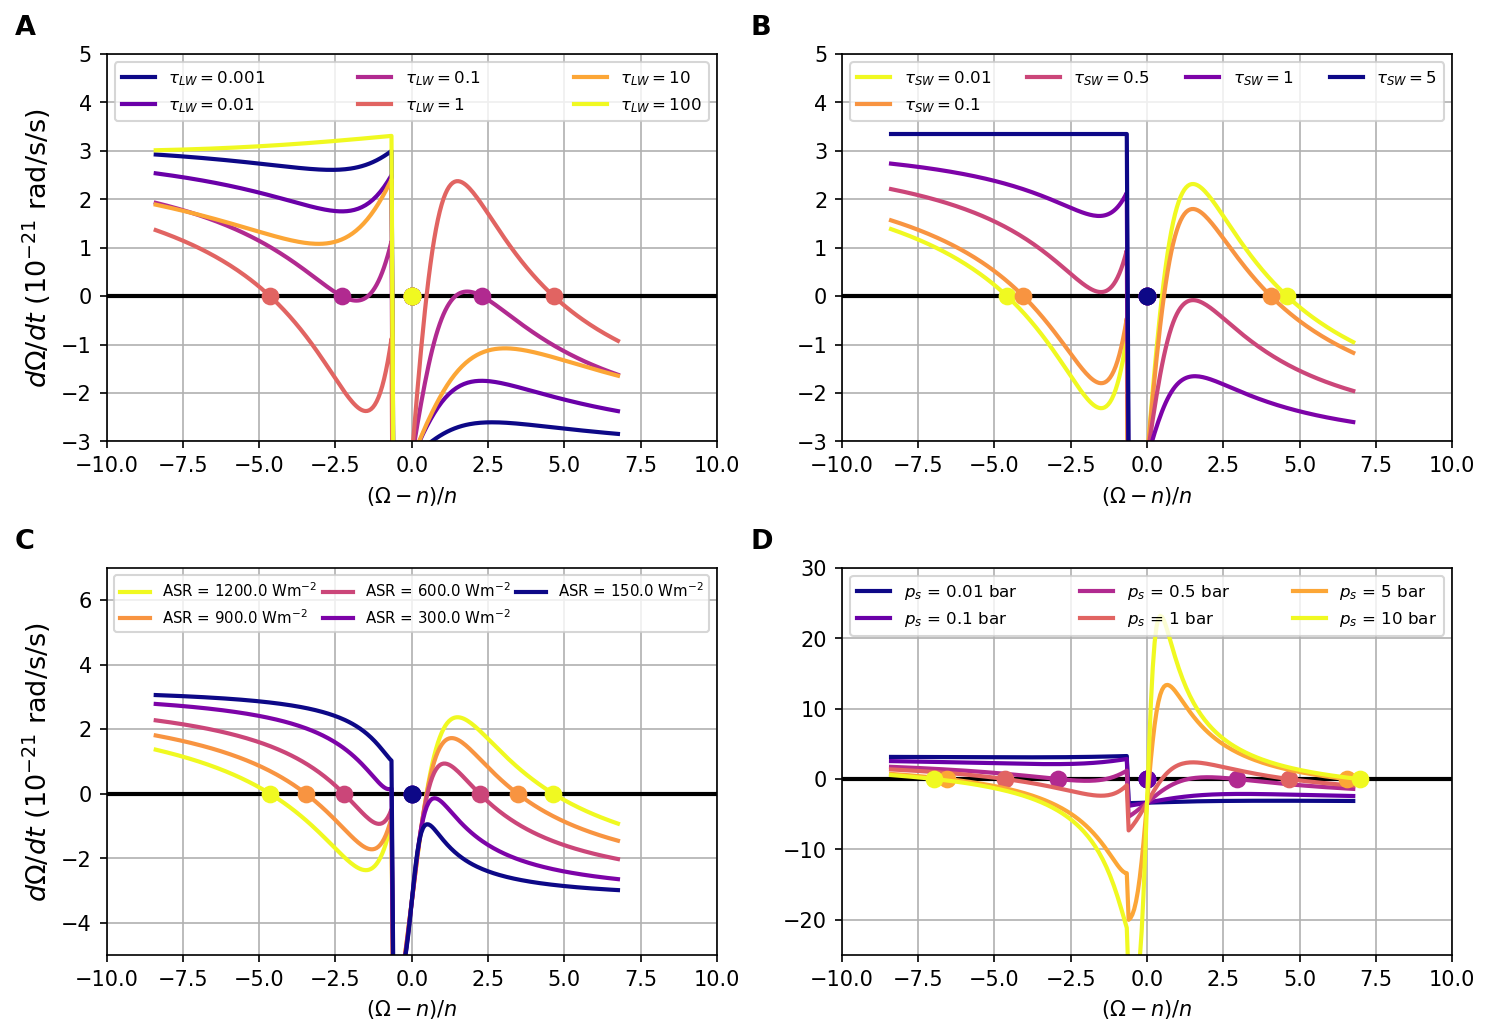

In [9]:
fig, ax = plt.subplots(2,2,figsize=(10,7), dpi=150, tight_layout=True)
Omega_list = np.linspace(-20*n, 21*n, 250)
taulw_list_fig4 = [1e-3, 1e-2, 1e-1, 1, 10, 100]
color= plt.cm.plasma(np.linspace(0,1,len(taulw_list_fig4)))
M_fig4 = 0.7*M_sun
a_fig4 = 0.33*AU
Tg = gravitational_tide_torque(M_fig4, R_E, a_fig4, 100,100, k2, Omega_list, n)


ax[0,0].axhline(y=0, linewidth = 2, color = 'k')
ax[0,1].axhline(y=0, linewidth = 2, color = 'k')
ax[1,0].axhline(y=0, linewidth = 2, color = 'k')
ax[1,1].axhline(y=0, linewidth = 2, color = 'k')

for i in range(len(taulw_list_fig4)):
    S, n = S_from_a(M_fig4,a_fig4)
    Ta = thermal_tide_torque(M_fig4, R_E, a_fig4, S, 0.2, 0.0001, taulw_list_fig4[i], 1*bar, Omega_list,n)
    eq_rot_analytic = eq_rotation_ana(M_fig4, R_E, a_fig4, 0.2, 0.0001, taulw_list_fig4[i], 1*bar, 100, 100, k2)/2 # returns 2(Omega-n)
    ax[0,0].plot((Omega_list-n)/n, 1e21*(Ta + Tg)/I , '-', color = color[i], linewidth = 2,label = '$\\tau_{LW} = $' + str(taulw_list_fig4 [i]))
    ax[0,0].plot([-eq_rot_analytic/n, eq_rot_analytic/n], [0,0],'.', color = color[i],markersize = 15)

ax[0,0].legend(ncol =3, mode='expand', fontsize=8)
ax[0,0].grid()
ax[0,0].set_ylabel('$d\Omega/dt$ ($10^{-21}$ rad/s/s)', fontsize = 13)
ax[0,0].set_xlabel('$(\\Omega -n)/n$')



tausw_list_fig4 = [1e-2, 1e-1, 0.5, 1, 5]
color= plt.cm.plasma_r(np.linspace(0,1,len(tausw_list_fig4)))
for i in range(len(tausw_list_fig4)):
    S, n = S_from_a(M_fig4,a_fig4)
    Ta = thermal_tide_torque(M_fig4, R_E, a_fig4, S, 0.2, tausw_list_fig4[i],1,1*bar, Omega_list, n)
    eq_rot_analytic = eq_rotation_ana(M_fig4, R_E, a_fig4,0.2, tausw_list_fig4[i],1, 1*bar, 100, 100, k2)/2
    ax[0,1].plot((Omega_list-n)/n, 1e21*(Tg+Ta)/I, '-', color = color[i], linewidth = 2,label = '$\\tau_{SW} = $' + str(tausw_list_fig4[i]))
    ax[0,1].plot([-eq_rot_analytic/n, eq_rot_analytic/n], [0,0],'.', color = color[i],markersize = 15)
ax[0,1].legend(ncol =4, mode='expand', fontsize=8)
ax[0,1].grid()
ax[0,1].set_xlabel('$(\\Omega -n)/n$')



alpha_list_fig4 = [0.2,0.4,0.6,0.8,0.9]
color= plt.cm.plasma_r(np.linspace(0,1,len(alpha_list_fig4)))
for i in range(len(alpha_list_fig4)):
    S, n = S_from_a(M_fig4,a_fig4)
    Ta = thermal_tide_torque(M_fig4, R_E, a_fig4,S, alpha_list_fig4[i], 0.001,1,1*bar, Omega_list, n)
    eq_rot_analytic = eq_rotation_ana(M_fig4, R_E, a_fig4,alpha_list_fig4[i], 0.001, 1, 1*bar, 100, 100, k2)/2
    ax[1,0].plot((Omega_list-n)/n, 1e21*(Tg+Ta)/I, '-', color = color[i], linewidth = 2,label = 'ASR = ' + str(np.round(S*(1-alpha_list_fig4[i]),-1)) + ' Wm$^{-2}$')
    ax[1,0].plot([-eq_rot_analytic/n, eq_rot_analytic/n], [0,0],'.', color = color[i],markersize = 15)
    
ax[1,0].legend(ncol =3, mode='expand', fontsize=7.2)
ax[1,0].grid()
ax[1,0].set_ylabel('$d\Omega/dt$ ($10^{-21}$ rad/s/s)', fontsize = 13)
ax[1,0].set_xlabel('$(\\Omega -n)/n$')



ps_list_fig4 = [1e-2, 1e-1, 0.5,1, 5,10]
color= plt.cm.plasma(np.linspace(0,1,len(ps_list_fig4)))
for i in range(len(ps_list_fig4)):
    S, n = S_from_a(M_fig4,a_fig4)
    Ta = thermal_tide_torque(M_fig4, R_E, a_fig4,S, 0.2, 0.001,1,ps_list_fig4[i]*bar, Omega_list, n)
    eq_rot_analytic = eq_rotation_ana(M_fig4, R_E, a_fig4,0.2, 0.0001, 1,ps_list_fig4[i]*bar,100, 100, k2)/2
    ax[1,1].plot((Omega_list-n)/n, 1e21*(Tg+Ta)/I, '-', color = color[i], linewidth = 2,label = '$p_s$ = ' + str(ps_list_fig4[i]) + ' bar')
    ax[1,1].plot([-eq_rot_analytic/n, eq_rot_analytic/n], [0,0],'.', color = color[i],markersize = 15)
ax[1,1].legend(ncol =3, mode='expand', fontsize=8)
ax[1,1].grid()
ax[1,1].set_xlabel('$(\\Omega -n)/n$')




ax[0,0].set_xlim(-10,10)
ax[0,1].set_xlim(-10,10)
ax[1,0].set_xlim(-10,10)
ax[1,1].set_xlim(-10,10)

ax[0,0].set_ylim(-3,5)
ax[0,1].set_ylim(-3,5)
ax[1,0].set_ylim(-5,7)
ax[1,1].set_ylim(-25,30)

ax[0,0].text(-0.15, 1.05,'A', transform=ax[0,0].transAxes, size=13, weight='bold')
ax[0,1].text(-0.15, 1.05,'B', transform=ax[0,1].transAxes, size=13, weight='bold')
ax[1,0].text(-0.15, 1.05,'C', transform=ax[1,0].transAxes, size=13, weight='bold')
ax[1,1].text(-0.15, 1.05,'D', transform=ax[1,1].transAxes, size=13, weight='bold')

#plt.savefig('./Paper Plots/SW_2023_Figure4.pdf', bbox_inches = 'tight')